In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import koreanize_matplotlib
import folium
import geopandas as gpd

roadkill1 = pd.read_csv('./data/roadkill1.csv')
ecopath = pd.read_csv('./data/ecopath.csv')
ecopath['수'] = 1
grid_10 = gpd.read_file('./data/(B100)국토통계_건축물-건축면적-(격자) 10KM_전국_202312/', crs='EPSG:4326')
grid_10 =  grid_10.to_crs('EPSG:4326')
grid_100 = gpd.read_file('./data/(B100)국토통계_건축물-건축면적-(격자) 100KM_전국_202312/', crs='EPSG:4326')
grid_100 =  grid_100.to_crs('EPSG:4326')
merged_df = pd.read_csv('./data/eco_rk_merged.csv')
map_df = gpd.read_file('./data/전국지도_5179/')
map_df =  map_df.to_crs('EPSG:4326')
map_df.head(3)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,layer,path,geometry
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437..."
1,30140,Jung-gu,중구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.45484 36.30162, 127.45484 36.301..."
2,30170,Seo-gu,서구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.37014 36.28918, 127.37014 36.289..."


In [103]:
g_eco=gpd.GeoDataFrame(ecopath, geometry=gpd.points_from_xy(ecopath.경도, ecopath.위도), crs='EPSG:4326')
g_rk=gpd.GeoDataFrame(roadkill1, geometry=gpd.points_from_xy(roadkill1.경도, roadkill1.위도), crs='EPSG:4326')

In [82]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

import libpysal as lps
import esda

from splot.esda import plot_moran, moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local

In [104]:
merged_df= gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df.경도, merged_df.위도), crs='EPSG:4326')
merged_df = merged_df.astype({ '발생건수' : 'int' })
merged_df = merged_df.astype({ '생태통로수' : 'int' })
merged_df

,위도,경도,발생건수,생태통로수,geometry
0,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
1,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
2,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
3,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
4,37.340987,127.912591,1,0,POINT (127.91259 37.34099)
...,...,...,...,...,...
984,37.786278,127.164814,0,1,POINT (127.16481 37.78628)
985,37.880278,128.514444,0,1,POINT (128.51444 37.88028)
986,36.652222,126.982500,0,1,POINT (126.98250 36.65222)
987,37.209167,129.337222,0,1,POINT (129.33722 37.20917)


In [105]:
merge = gpd.sjoin(map_df, merged_df[['생태통로수','발생건수','geometry']],how='left',op='contains').fillna(0)
merge.head(3)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,layer,path,geometry,index_right,생태통로수,발생건수
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",458.0,1.0,0.0
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",459.0,1.0,0.0
0,30110,Dong-gu,동구,TL_SCCO_SIG,C:/Users/yeonj/OneDrive/바탕 화면/업무/망고시스템/업무용 기타데...,"POLYGON ((127.49243 36.43937, 127.49152 36.437...",223.0,0.0,1.0


In [110]:
merge_grid_10 = gpd.sjoin(grid_10, merged_df[['생태통로수','발생건수','geometry']],how='left',op='contains').fillna(0)
merge_grid_100 = gpd.sjoin(grid_100, merged_df[['생태통로수','발생건수','geometry']],how='left',op='contains').fillna(0)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [119]:
eco_sum_10 = merge_grid_10['생태통로수'].groupby([merge_grid_10['gid']]).sum()
eco_final_10 = grid_10.merge(eco_sum_10, on='gid')
eco_final_10.rename(columns={'gid': 'adm'}, inplace=True)
eco_final_10.rename(columns={'생태통로수': 'eco_sum'}, inplace=True)

rk_sum_10 = merge_grid_10['발생건수'].groupby([merge_grid_10['gid']]).sum()
rk_final_10 = grid_10.merge(rk_sum_10, on='gid')
rk_final_10.rename(columns={'gid': 'adm'}, inplace=True)
rk_final_10.rename(columns={'발생건수': 'rk_sum'}, inplace=True)

In [121]:
final = pd.merge(eco_final_10[['adm', 'geometry','eco_sum']], rk_final_10[['adm', 'geometry','rk_sum']], on=['adm', 'geometry'])
final.head()

,adm,geometry,eco_sum,rk_sum
0,ë§ë°28,"POLYGON ((128.84707 36.91071, 128.84866 37.000...",0.0,0.0
1,ëë¤79,"POLYGON ((126.08742 34.29542, 126.08591 34.385...",0.0,0.0
2,ë¤ë°78,"POLYGON ((127.16319 36.91788, 127.16280 37.008...",0.0,0.0
3,ë¤ë27,"POLYGON ((126.64151 33.21829, 126.64062 33.308...",0.0,0.0
4,ë¤ë¼61,"POLYGON ((127.06437 34.48315, 127.06390 34.573...",0.0,0.0


In [122]:
# 공간 유사성(Spatial similarity)
w =  lps.weights.Queen.from_dataframe(final, silence_warnings=True)
w.transform = 'r'

# 속성 유사성(Attribute similarity)
# final['weighted'] = lps.weights.lag_spatial(w, final['eco_sum'])
# eco_final.head()

C:\Users\user\AppData\Local\Temp\ipykernel_48868\1786252409.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w =  lps.weights.Queen.from_dataframe(final, silence_warnings=True)


C:\Users\user\AppData\Local\Temp\ipykernel_48868\3694966511.py:3: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  final.plot(column='rk_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax[0], colormap='OrRd') # 분위수
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


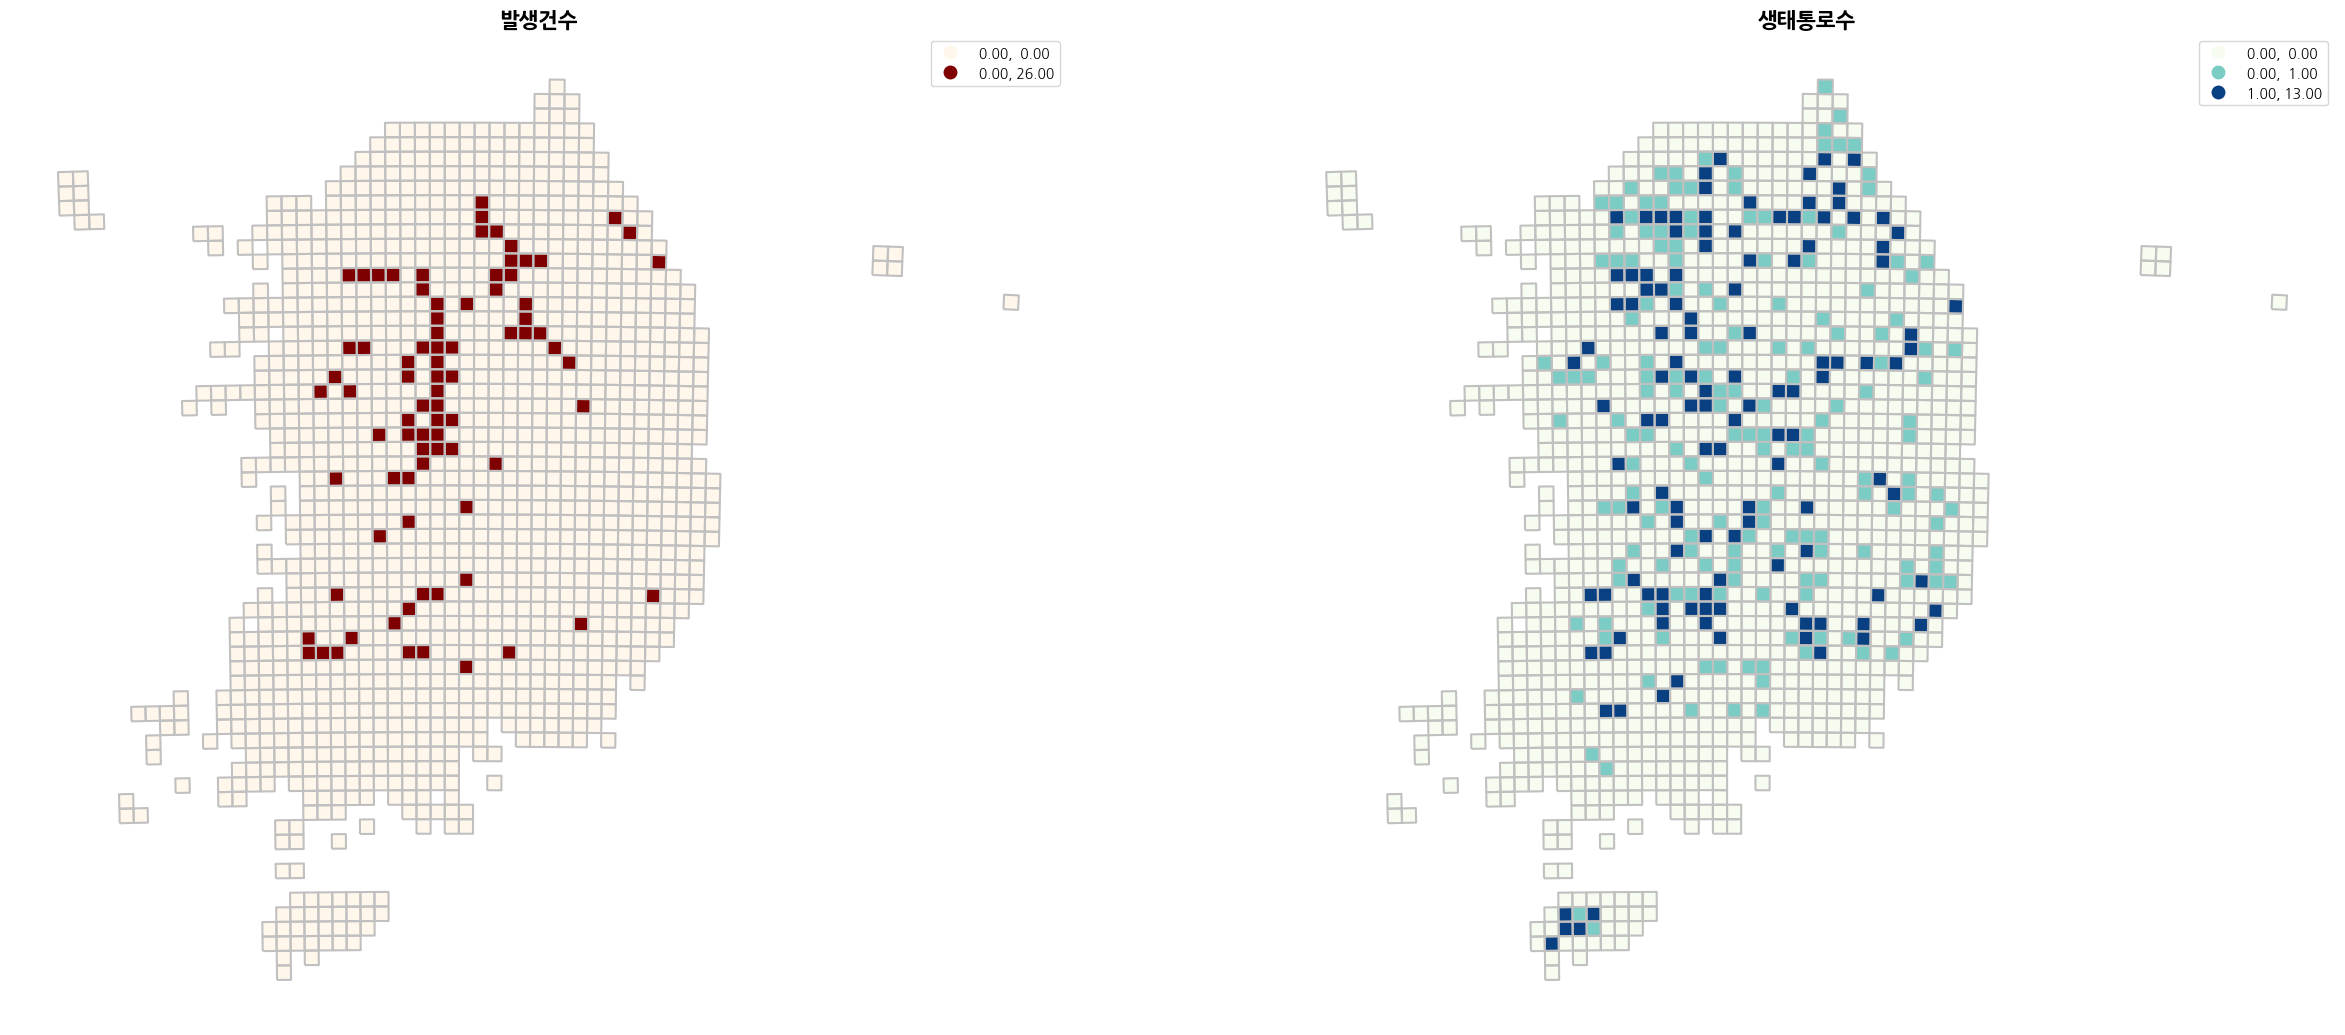

In [123]:
f,ax = plt.subplots(1,2,figsize=(30,30))

final.plot(column='rk_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax[0], colormap='OrRd') # 분위수
final.boundary.plot(ax=ax[0], color='silver')
ax[0].set_title("발생건수", fontsize=15, fontweight='bold')
ax[0].axis('off')

final.plot(column='eco_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax[1]) # 분위수
final.boundary.plot(ax=ax[1], color='silver')
ax[1].set_title("생태통로수", fontsize=15, fontweight='bold')
ax[1].axis('off')

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_48868\397406252.py:4: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  final.plot(column='rk_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax, colormap='Reds') # 분위수
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 2.
  self.bins = quantile(y, k=k)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mapclassify\classifiers.py:1592: UserWarning: Not enough unique values in array to form 10 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


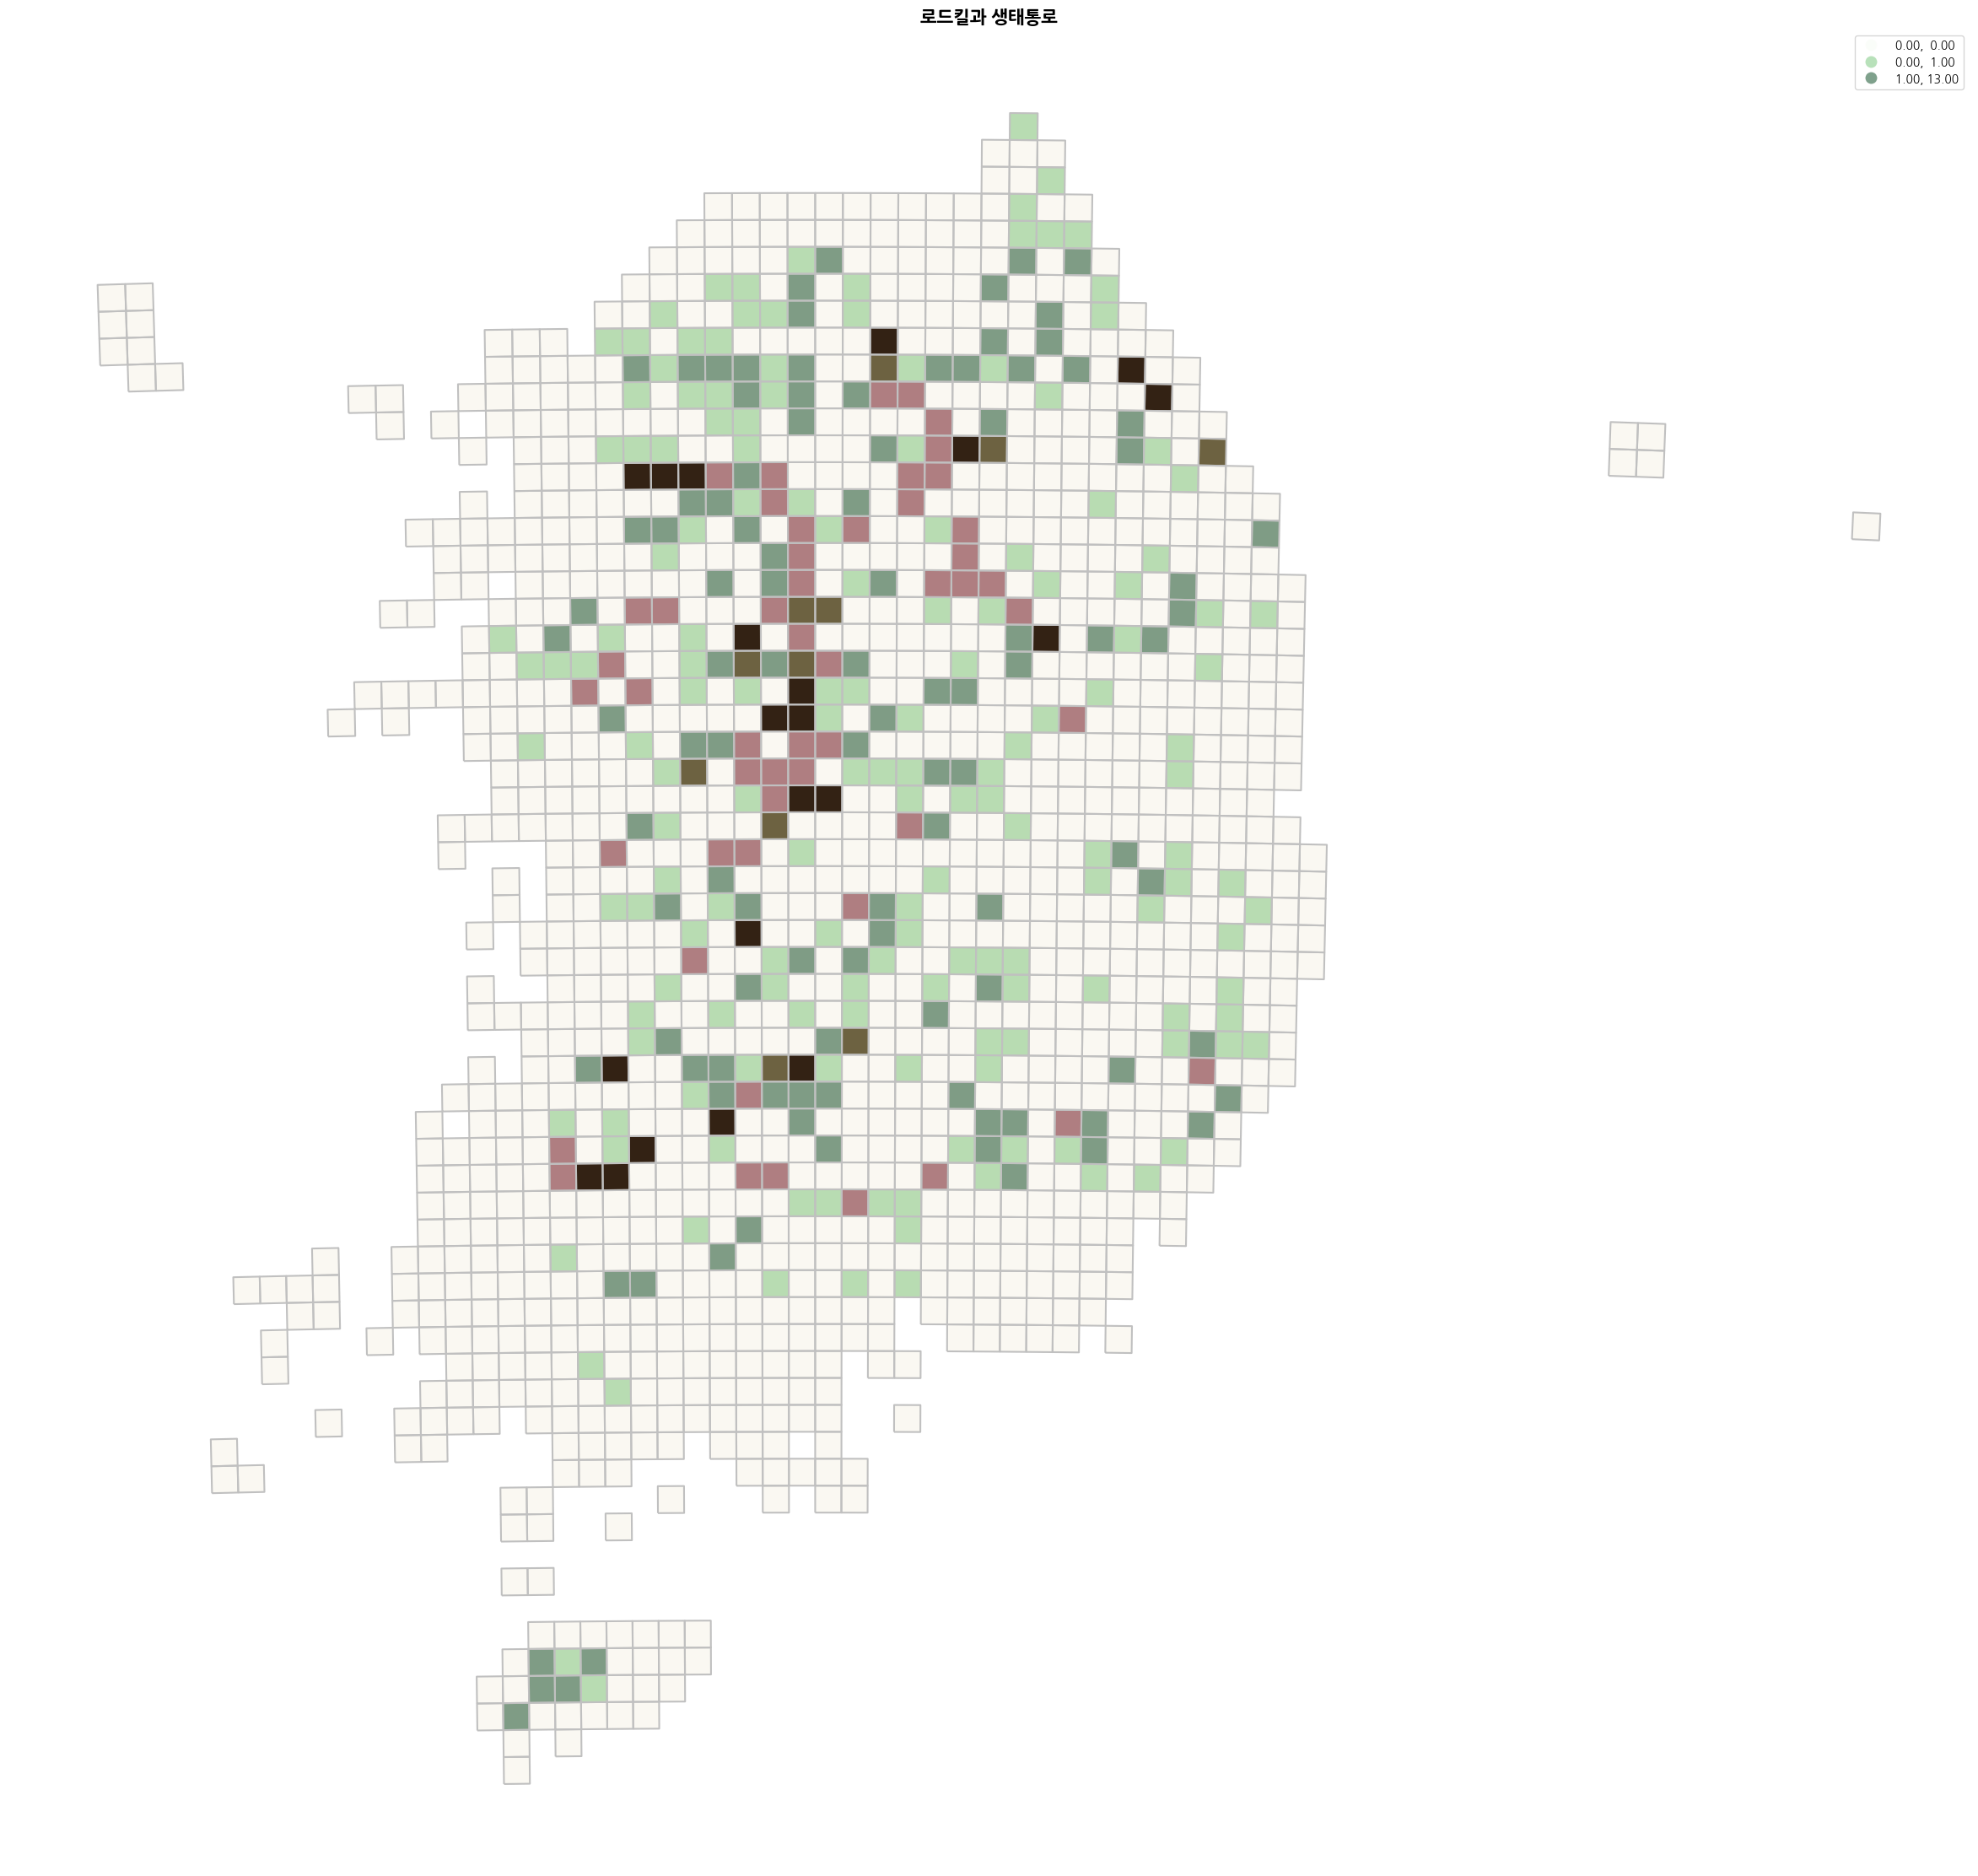

In [129]:
f,ax = plt.subplots(1,1,figsize=(30,30))

final.boundary.plot(ax=ax, color='silver')
final.plot(column='rk_sum', scheme='Quantiles', k=10, cmap='GnBu', legend=True, ax=ax, colormap='Reds') # 분위수
final.plot(column='eco_sum', scheme='Quantiles', k=10, cmap='Greens', legend=True, ax=ax, alpha=0.5) # 분위수
ax.set_title("로드킬과 생태통로", fontsize=15, fontweight='bold')
ax.axis('off')

plt.show()

In [130]:
eco_final1=eco_final_10[eco_final_10['eco_sum']>0][['adm','geometry','eco_sum']]
eco_final1.head(3)

,adm,geometry,eco_sum
7,ë¤ë¤29,"POLYGON ((126.63065 34.30048, 126.62972 34.390...",1.0
9,ë¤ë¼69,"POLYGON ((127.06056 35.20454, 127.06007 35.294...",2.0
10,ë¼ì¬64,"POLYGON ((128.17842 37.45725, 128.17923 37.547...",1.0


In [148]:
# 광역적 공간 자기상관
w1 =  lps.weights.Queen.from_dataframe(eco_final_10, silence_warnings=True)
w1.transform = 'r'
y1 = eco_final_10.eco_sum
moran1 = esda.Moran(y1, w1)
moran1.I, moran1.p_sim # Moran의 I값, p-값

C:\Users\user\AppData\Local\Temp\ipykernel_48868\1613803910.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w1 =  lps.weights.Queen.from_dataframe(eco_final_10, silence_warnings=True)


(0.14447128161180395, 0.001)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


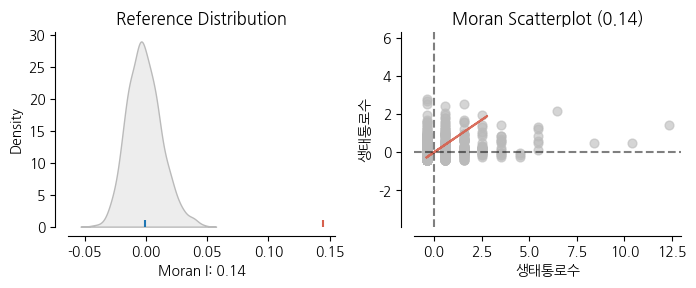

In [149]:
plot_moran(moran1, zstandard=True, figsize=(7,3))

plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('생태통로수')
plt.xlabel('생태통로수')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


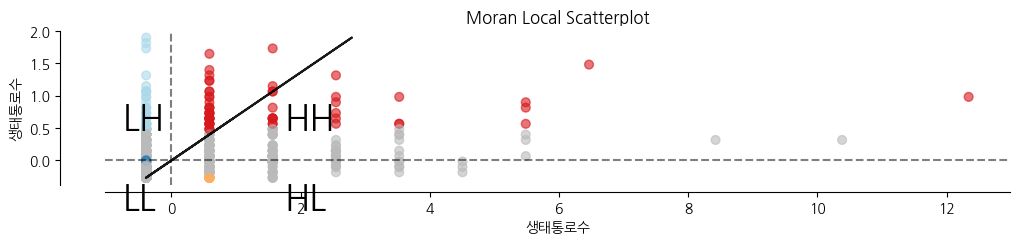

In [153]:
# 지역 공간 자기상관
moran_local1 = Moran_Local(y1, w1)

fig, ax = plt.subplots(figsize=(20,2))
moran_scatterplot(Moran_Local(y1, w), p=0.05, ax=ax)
ax.set_xlabel('생태통로수')
ax.set_ylabel('생태통로수')
plt.text(1.75, 0.50, 'HH', fontsize=25)
plt.text(1.75, -0.75, 'HL', fontsize=25)
plt.text(-0.75, 0.50, 'LH', fontsize=25)
plt.text(-0.75, -0.75, 'LL', fontsize=25)
plt.show()

In [155]:
# 광역적 공간 자기상관
w2 =  lps.weights.Queen.from_dataframe(rk_final_10, silence_warnings=True)
w2.transform = 'r'
y2 = rk_final_10.rk_sum
moran2 = esda.Moran(y2, w2)
moran2.I, moran2.p_sim # Moran의 I값, p-값

C:\Users\user\AppData\Local\Temp\ipykernel_48868\1834818277.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w2 =  lps.weights.Queen.from_dataframe(rk_final_10, silence_warnings=True)


(0.18093553723597594, 0.001)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


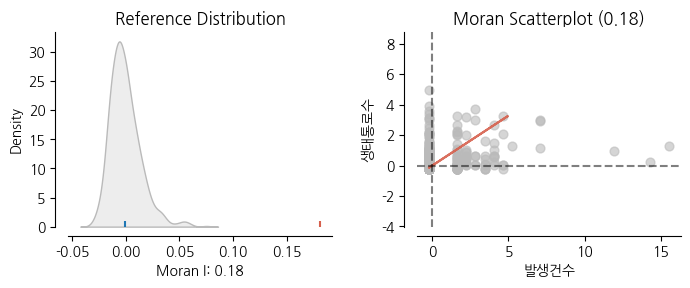

In [156]:
plot_moran(moran2, zstandard=True, figsize=(7,3))

plt.rcParams['axes.unicode_minus'] = False
plt.ylabel('생태통로수')
plt.xlabel('발생건수')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


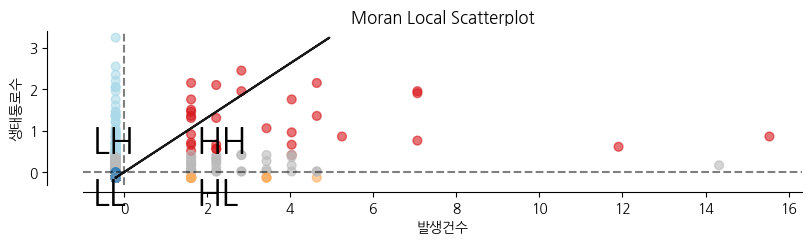

In [157]:
# 지역 공간 자기상관
moran_local2 = Moran_Local(y2, w2)

fig, ax = plt.subplots(figsize=(20,2))
moran_scatterplot(Moran_Local(y2, w2), p=0.05, ax=ax)
ax.set_xlabel('발생건수')
ax.set_ylabel('생태통로수')
plt.text(1.75, 0.50, 'HH', fontsize=25)
plt.text(1.75, -0.75, 'HL', fontsize=25)
plt.text(-0.75, 0.50, 'LH', fontsize=25)
plt.text(-0.75, -0.75, 'LL', fontsize=25)
plt.show()

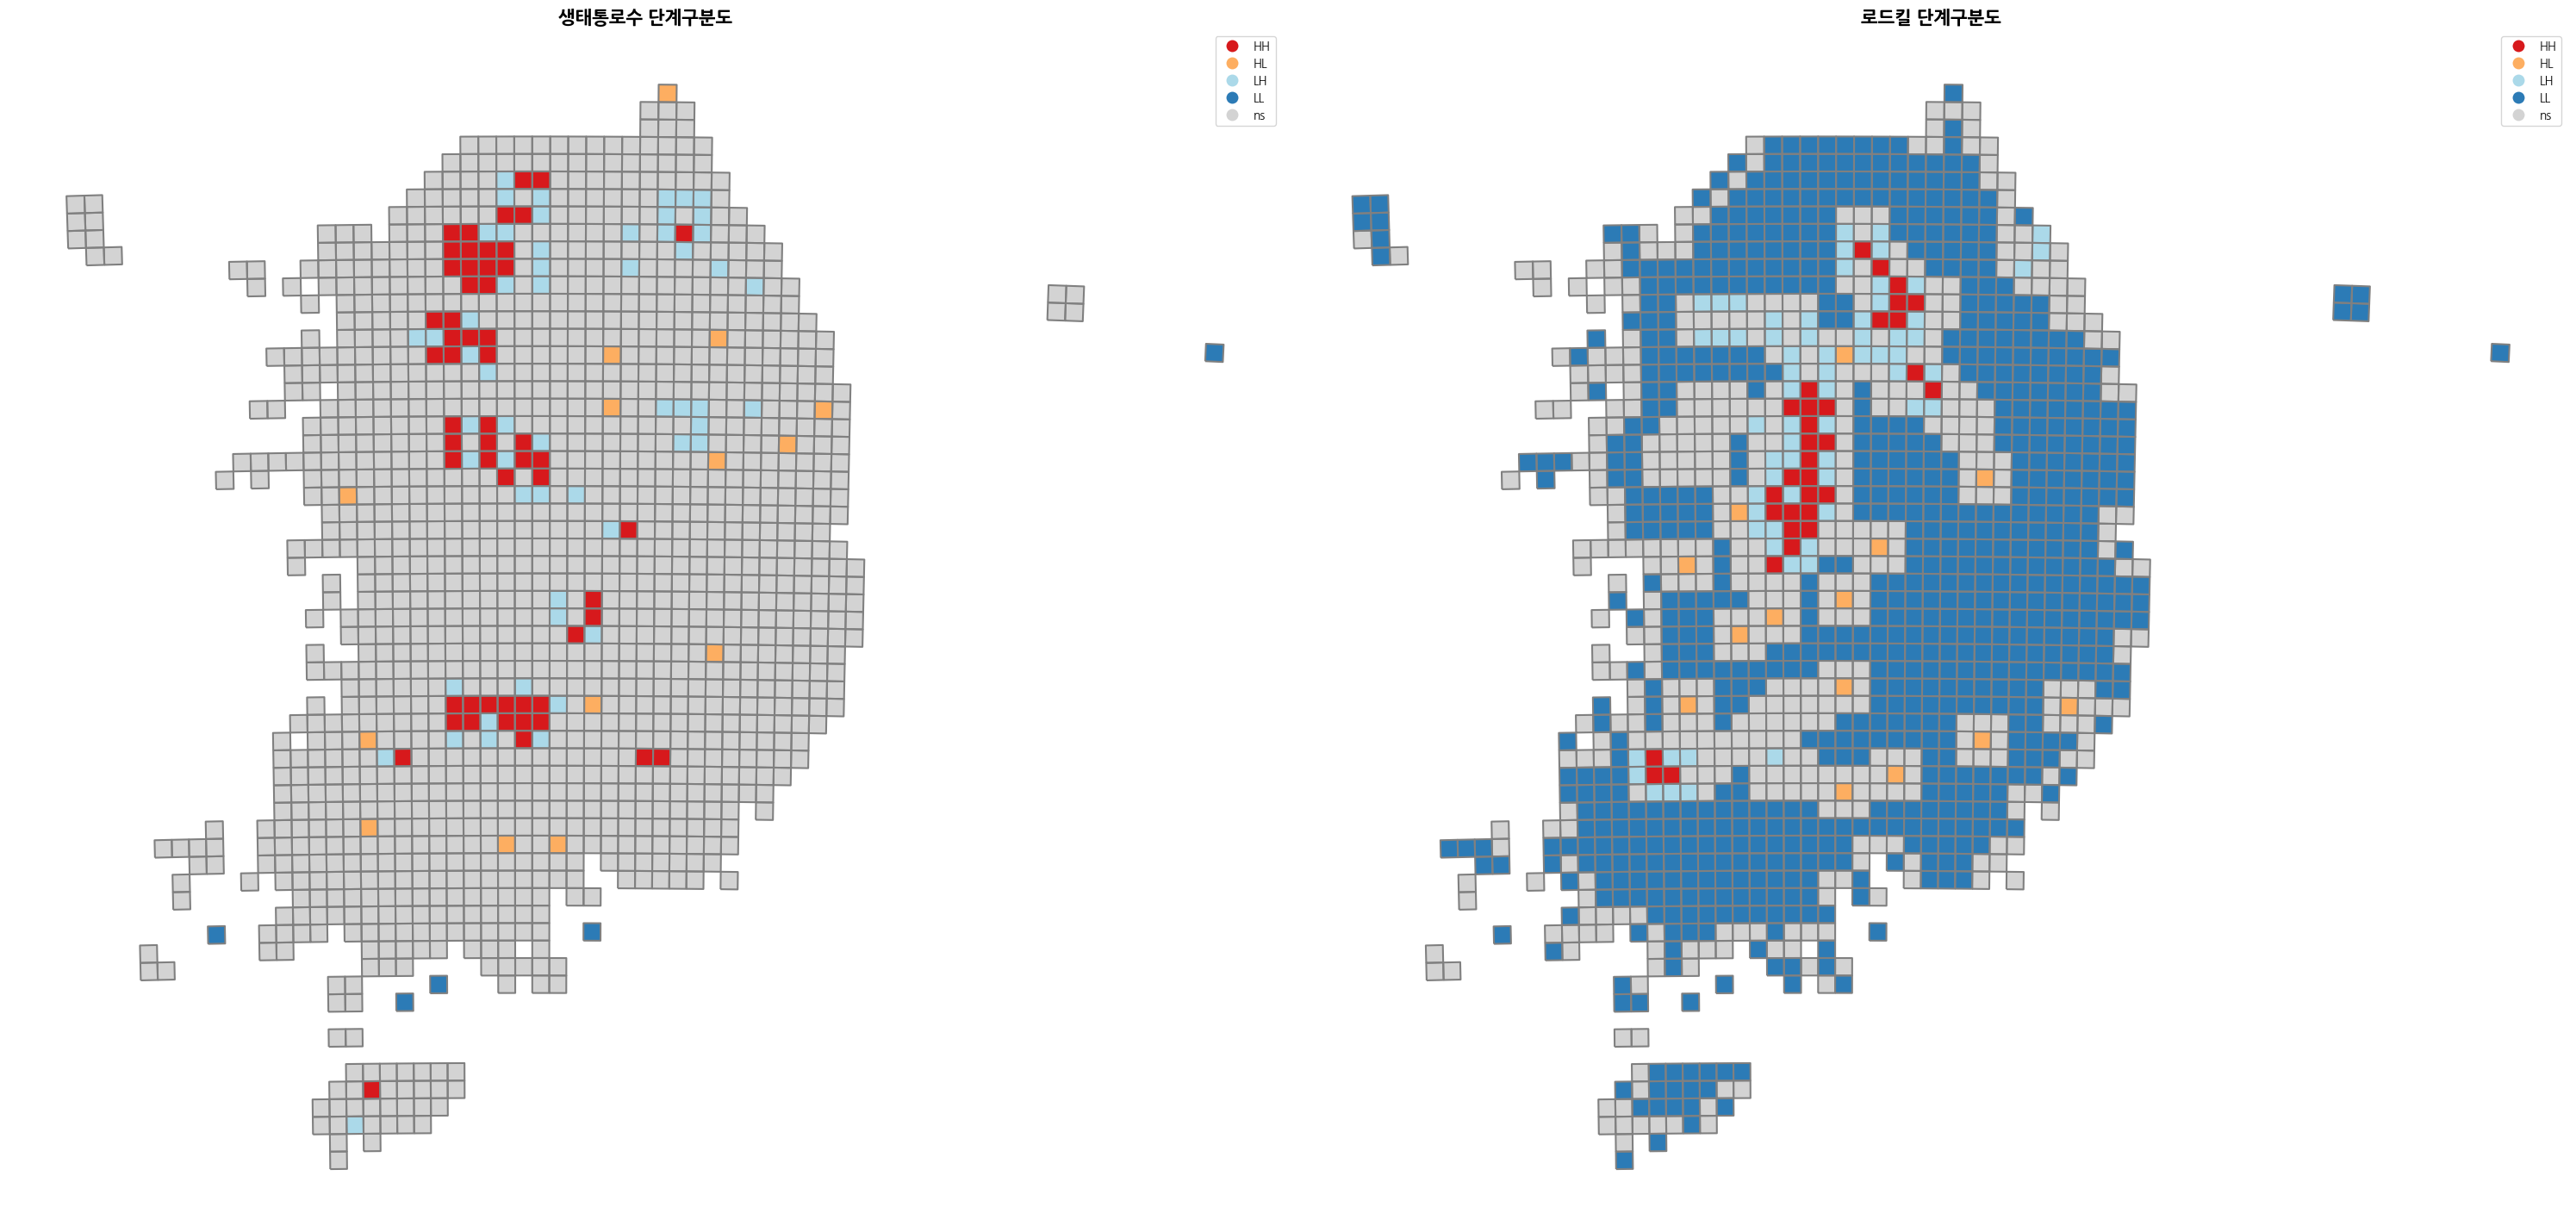

In [168]:
f,ax = plt.subplots(1,2,figsize=(30,30))

fig = lisa_cluster(moran_local1, final, p=0.05, ax=ax[0])
final.boundary.plot(ax=ax[0], color='grey')
ax[0].set_title('생태통로수 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
ax[0].axis('off')

fig = lisa_cluster(moran_local2, final, p=0.05, ax=ax[1])
final.boundary.plot(ax=ax[1], color='grey')
ax[1].set_title('로드킬 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
ax[1].axis('off')

plt.show()

In [296]:
cat = pd.read_csv('./data/동물/Felis_catus(고양이).csv')
cat = cat[['decimalLatitude','decimalLongitude','stateProvince']]
gorani = pd.read_csv('./data/동물/Hydropotes inermis(고라니).csv')
gorani = gorani[['decimalLatitude','decimalLongitude','stateProvince']]
nuguri = pd.read_csv('./data/동물/Nyctereutes_procyonoides(너구리).csv')
nuguri = nuguri[['decimalLatitude','decimalLongitude','stateProvince']]

In [297]:
cat['cnt']=1
gorani['cnt']=1
nuguri['cnt']=1

In [298]:
g_cat=gpd.GeoDataFrame(cat, geometry=gpd.points_from_xy(cat.decimalLongitude, cat.decimalLatitude), crs='EPSG:4326')
g_gorani=gpd.GeoDataFrame(gorani, geometry=gpd.points_from_xy(gorani.decimalLongitude, gorani.decimalLatitude), crs='EPSG:4326')
g_nuguri=gpd.GeoDataFrame(nuguri, geometry=gpd.points_from_xy(nuguri.decimalLongitude, nuguri.decimalLatitude), crs='EPSG:4326')

In [299]:
cat_grid_10 = gpd.sjoin(grid_10, g_cat[['cnt','geometry']],how='left',op='contains').fillna(0)
gorani_grid_10 = gpd.sjoin(grid_10, g_gorani[['cnt','geometry']],how='left',op='contains').fillna(0)
nuguri_grid_10 = gpd.sjoin(grid_10, g_nuguri[['cnt','geometry']],how='left',op='contains').fillna(0)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please

In [300]:
cat_sum_10 = cat_grid_10['cnt'].groupby([cat_grid_10['gid']]).sum()
cat_final_10 = grid_10.merge(cat_sum_10, on='gid')
cat_final_10.rename(columns={'gid': 'adm'}, inplace=True)

gorani_sum_10 = gorani_grid_10['cnt'].groupby([gorani_grid_10['gid']]).sum()
gorani_final_10 = grid_10.merge(gorani_sum_10, on='gid')
gorani_final_10.rename(columns={'gid': 'adm'}, inplace=True)

nuguri_sum_10 = nuguri_grid_10['cnt'].groupby([nuguri_grid_10['gid']]).sum()
nuguri_final_10 = grid_10.merge(nuguri_sum_10, on='gid')
nuguri_final_10.rename(columns={'gid': 'adm'}, inplace=True)

In [302]:
# 광역적 공간 자기상관
wa =  lps.weights.Queen.from_dataframe(cat_final_10, silence_warnings=True)
wa.transform = 'r'
ya = cat_final_10.cnt
moran1 = esda.Moran(ya, wa)
moran1.I, moran1.p_sim # Moran의 I값, p-값
moran_local1 = Moran_Local(ya, wa)

# 광역적 공간 자기상관
wb =  lps.weights.Queen.from_dataframe(gorani_final_10, silence_warnings=True)
wb.transform = 'r'
yb = gorani_final_10.cnt
moran2 = esda.Moran(yb, wb)
moran2.I, moran2.p_sim # Moran의 I값, p-값
moran_local2 = Moran_Local(yb, wb)

# 광역적 공간 자기상관
wc =  lps.weights.Queen.from_dataframe(nuguri_final_10, silence_warnings=True)
wc.transform = 'r'
yc = nuguri_final_10.cnt
moran3 = esda.Moran(yc, wc)
moran3.I, moran3.p_sim # Moran의 I값, p-값
moran_local3 = Moran_Local(yc, wc)

C:\Users\user\AppData\Local\Temp\ipykernel_48868\2720076509.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wa =  lps.weights.Queen.from_dataframe(cat_final_10, silence_warnings=True)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\esda\moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
C:\Users\user\AppData\Local\Temp\ipykernel_48868\2720076509.py:10: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wb =  lps.weights.Queen.from_dataframe(gorani_final_10, silence_warnings=True)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packa

In [270]:
print(moran_local1, moran_local2, moran_local3)

<esda.moran.Moran_Local object at 0x00000211DFBD3590> <esda.moran.Moran_Local object at 0x00000211DE6F3810> <esda.moran.Moran_Local object at 0x00000211DFE5B050>


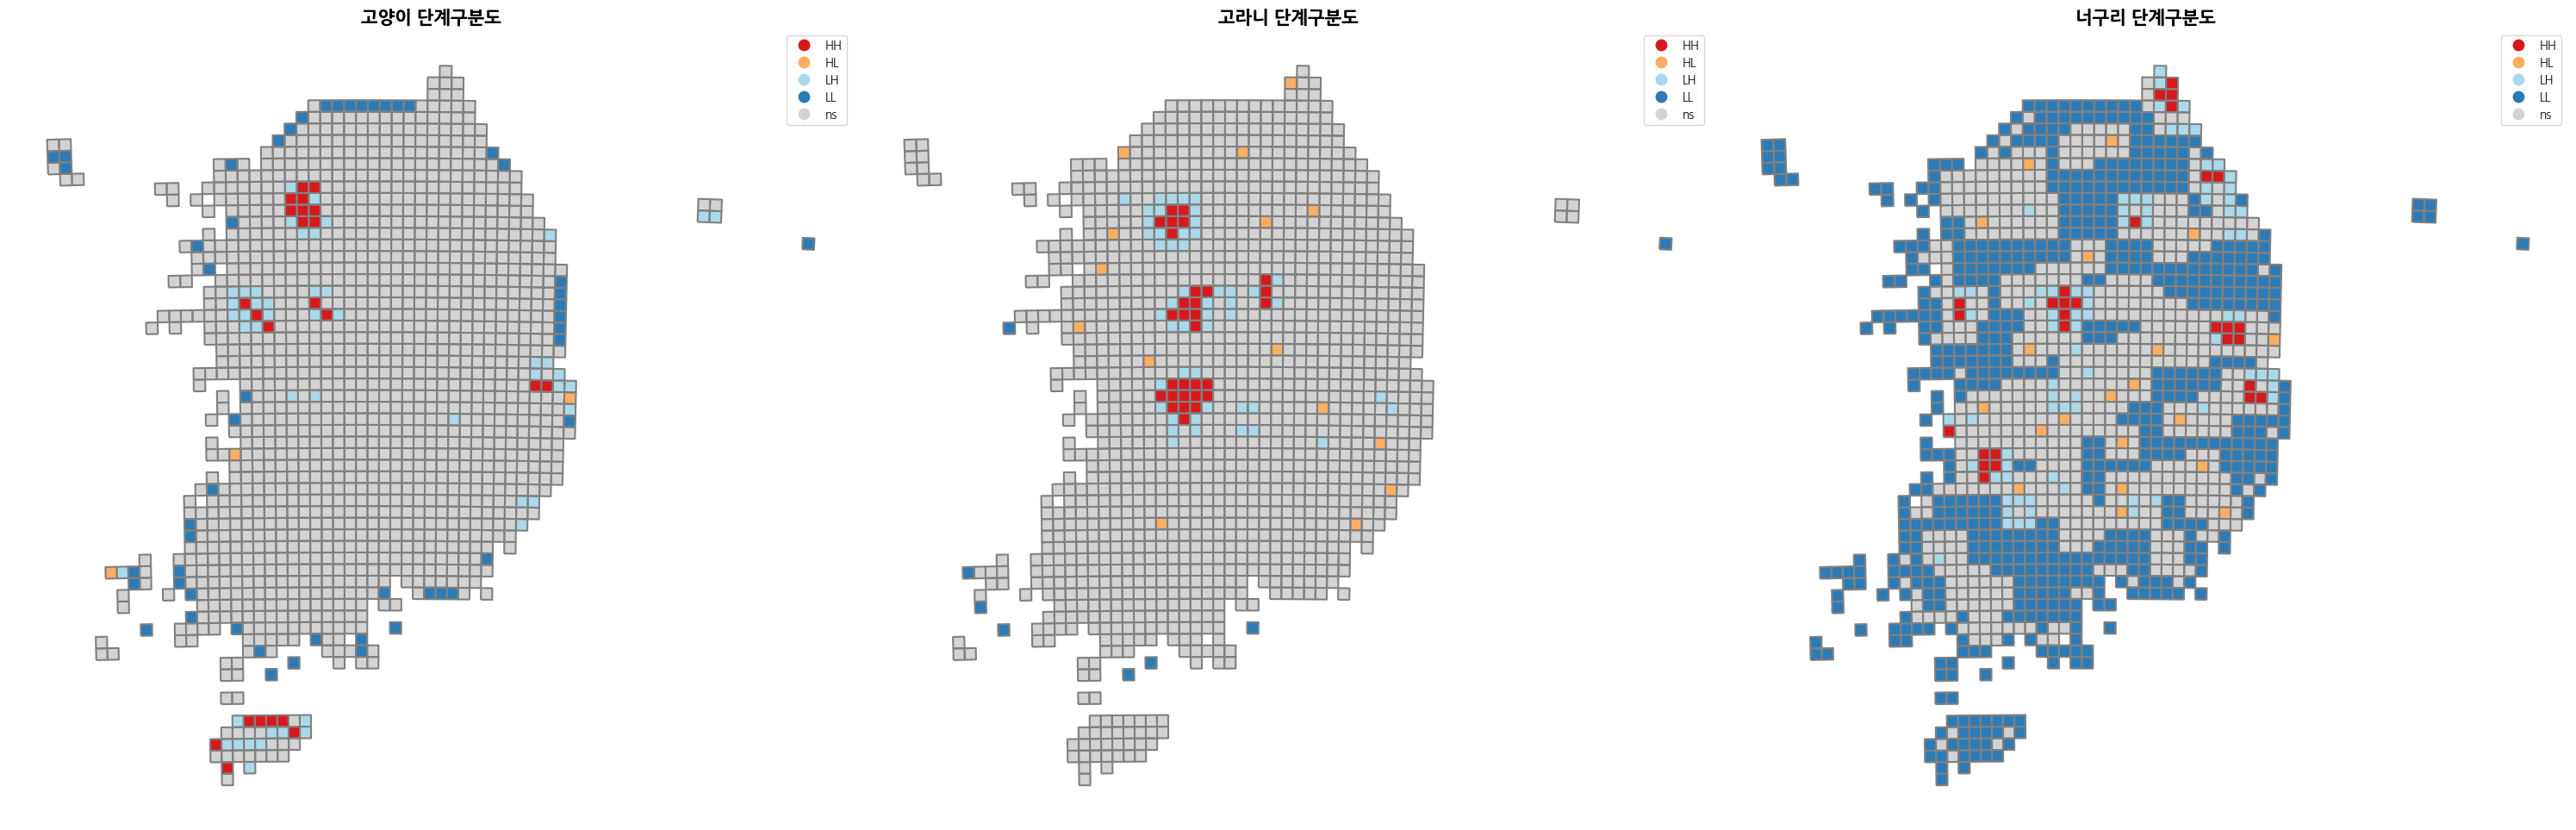

In [303]:
f,ax = plt.subplots(1,3,figsize=(30,30))

fig = lisa_cluster(moran_local1, cat_final_10, p=0.05, ax=ax[0])
cat_final_10.boundary.plot(ax=ax[0], color='grey')
ax[0].set_title('고양이 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
ax[0].axis('off')

fig = lisa_cluster(moran_local2, gorani_final_10, p=0.05, ax=ax[1])
gorani_final_10.boundary.plot(ax=ax[1], color='grey')
ax[1].set_title('고라니 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
ax[1].axis('off')

fig = lisa_cluster(moran_local3, nuguri_final_10, p=0.05, ax=ax[2])
nuguri_final_10.boundary.plot(ax=ax[2], color='grey')
ax[2].set_title('너구리 단계구분도', fontsize=15, fontweight='bold')
plt.tight_layout()
ax[2].axis('off')

plt.show()

In [304]:
# 라이브러리 호출
import gpxpy
import pandas as pd
import os
from glob import glob
import geopandas
from datetime import datetime

# GeoDataFrame을 Shapefile로 저장
final.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
final.to_file('./data/eco_rk_10.shp', driver='ESRI Shapefile')

cat_final_10.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
cat_final_10.to_file('./data/cat_final_10.shp', driver='ESRI Shapefile')
gorani_final_10.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
gorani_final_10.to_file('./data/gorani_final_10.shp', driver='ESRI Shapefile')
nuguri_final_10.crs= "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"
nuguri_final_10.to_file('./data/nuguri_final_10.shp', driver='ESRI Shapefile')